In [6]:
import os
import csv
import ast
import datetime
import json
import matplotlib.pyplot as plt

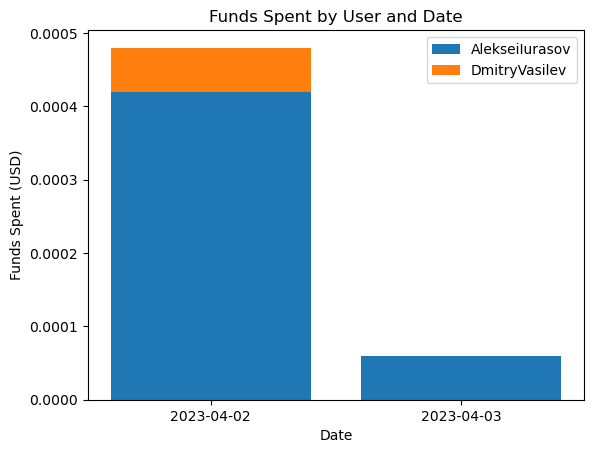

In [11]:
logs_path = 'logs/'
usernames_path = 'user_conf'
# Create a dictionary to map user IDs to real names
user_names = {}
for filename in os.listdir(usernames_path):
    if filename=='config.json':
        continue
    with open(os.path.join(usernames_path, filename), 'r') as f:
        # print(os.path.join(usernames_path, filename))
        data = json.load(f)
        user_id = filename.split('.')[0]
        user_id = ''.join(filter(str.isdigit, user_id))
        user_names[user_id] = data['name']

# Initialize empty dictionary for each user
users_funds = {}

# Calculate date N days ago
cutoff_date = datetime.datetime.now() - datetime.timedelta(days=3)

# Loop through all CSV files
for filename in os.listdir(logs_path):
    
    if not '.csv' in filename:
        continue
    
    
        
    # Extract user ID from filename
    user_id = filename.split('.')[0]
    user_id = ''.join(filter(str.isdigit, user_id))
    # Get the real name of the user
    if user_id in user_names:
        user_name = user_names[user_id]
    else:
        user_name = user_id
    
    with open(os.path.join(logs_path, filename), newline='') as csvfile:
        
        reader = csv.reader(csvfile, delimiter=';')
        for row in reader:
            # Parse timestamp and extract date
            timestamp = datetime.datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S.%f')
            date = timestamp.strftime('%Y-%m-%d')
            
            # Extract date from filename
            # date_str = filename.split('.')[0]
            # date = datetime.datetime.strptime(date_str, '%Y-%m-%d')

            # Skip files that are older than N days
            # if date < cutoff_date:
            #     continue
            if datetime.datetime.strptime(date, '%Y-%m-%d') < cutoff_date:
                continue
            
            # Evaluate token count and calculate funds
            token_count = len(ast.literal_eval(row[2]))
            funds = token_count * 0.02 / 1000
            
            # Append funds to corresponding user's list for this date
            if date not in users_funds:
                users_funds[date] = {}
            if user_name not in users_funds[date]:
                users_funds[date][user_name] = 0
            users_funds[date][user_name] += funds

# Prepare data for plotting
user_names_sorted = sorted(list(set([user_name for date in users_funds for user_name in users_funds[date]])))
dates = sorted(list(users_funds.keys()))
funds_by_user_and_date = [[users_funds[date].get(user_name, 0) for date in dates] for user_name in user_names_sorted]

# Plot stacked bar chart
fig, ax = plt.subplots()
ax.bar(dates, funds_by_user_and_date[0], label=user_names_sorted[0])
bottom = funds_by_user_and_date[0]
for i in range(1, len(user_names_sorted)):
    ax.bar(dates, funds_by_user_and_date[i], bottom=bottom, label=user_names_sorted[i])
    bottom = [bottom[j] + funds_by_user_and_date[i][j] for j in range(len(dates))]

# Add chart labels and legend
plt.xlabel('Date')
plt.ylabel('Funds Spent (USD)')
plt.title('Funds Spent by User and Date')
plt.legend()

# Save chart to image file
plt.savefig('funds_spent.png')